# 2008 USA Flights Data Exploration

## Purpose of Analysis

In this project, I am interested to see if the flights arrival delay is affected by any factors. My initial intuition is that departure delay has a direct effect on the arrival delay.  However, I would like to see how other types of delay such as carrier, weather, National Aviation System, security, and late aircraft may affect both arrival and departure delay. <br>

Another important variable that I believe could have an effect on the flight delay is the month of the year.  For example, December could have more flight delay since snowing is more likely to happen.  <br>

Now, some airline carriers may cause more delay than other carriers may do, so I am going to include this variable in the analysis, as well as checking which carrier seems to be better in reducing flight delay.  <br>

Other factors such as diverted fights, distance between two airports may not have a distinct effect on the flight delay, but I am going to include those in the analysis. 

## Variables of Interest
- Month
- UniqueCarrier
- ArrDelay
- DepDelay
- Dest
- Distance
- Diverted
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay

In [79]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline

In [80]:
# read csv files
df_copy = pd.read_csv('slide_show_data_full.csv')
df_copy_v2 = pd.read_csv('slide_show_data.csv')

## Explanatory Data Analysis

### Relationship between Departure Delay and Arrival Delay

To see the relationship between departuer delay `DepDelay` and arrival delay `ArrDelay`, I am going to create a scatter plot

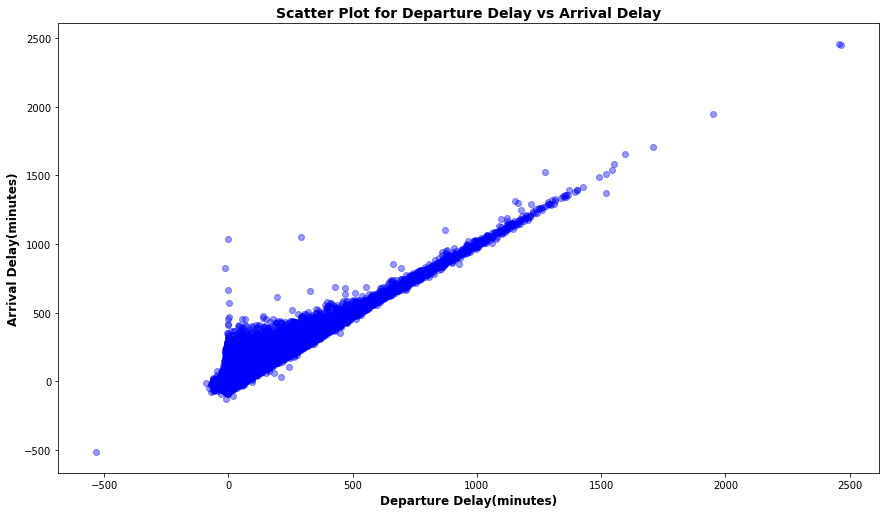

In [81]:
# scatter plot for DepDelay vs ArrDelay
plt.figure(figsize = [14.70, 8.27])
plt.scatter(data = df_copy, x = 'DepDelay', y = 'ArrDelay', alpha = .4)
plt.title('Scatter Plot for Departure Delay vs Arrival Delay', fontsize = 14, weight = 'bold')
plt.xlabel('Departure Delay(minutes)', fontsize = 12, weight = 'semibold')
plt.ylabel('Arrival Delay(minutes)', fontsize = 12, weight = 'semibold');

The scatter plot depict a strong positive linear relationship. However, we can also notice that we have some data points where arrival delay is higher than the departure delay. The most extreme ones are when departure delay is around zero and arrival delay is up to ~1100 minutes. This variability could have been affected by other variables, which I am going to show in the next slide.

### Relationship between Departure Delay, Arival Delay, and a Third Numeric Variable.

In this slide, I am going to show how `CarrierDelay`, `WeatherDelay`, `SecurityDelay`, `NASDelay`, and `LateAircraftDelay` relate to `ArrDelay` and `DepDelay`

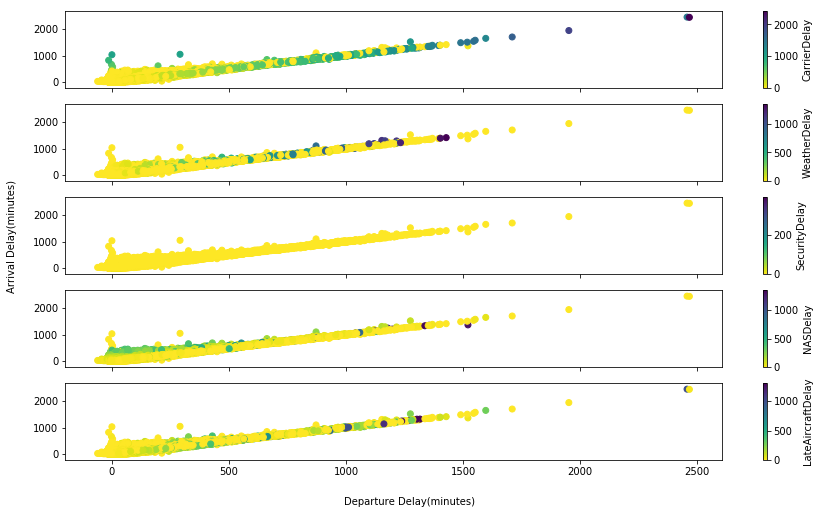

In [82]:
fig, ax = plt.subplots(nrows = 5, sharex = True, sharey=True, figsize = [14.70, 8.27])

variables = ['CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'NASDelay', 'LateAircraftDelay']
for i in range(len(variables)):
    var = variables[i]
    splot = ax[i].scatter(data = df_copy_v2, x = 'DepDelay', y = 'ArrDelay' , c = var, cmap = 'viridis_r')
    plt.colorbar(splot, ax = ax[i], label = var)

fig.text(.45, .05, 'Departure Delay(minutes)', ha = 'center')
fig.text(.07, .5, 'Arrival Delay(minutes)', va = 'center', rotation = 'vertical')
plt.show()

From the first scatter plot, we see that the departure delay between 500 and 1100 minutes seems to be affected by carrier delay as it is represented  by the green dots. And if we look at the color bar we realize that this shade of green refers to values between 500 and 1000, which explains the arrival delay.  We can also realize that the effect of carrier delay is increasing along the scatter plot until it reaches its peak for values more than 2000.<br>

In the third scatter plot, it seems that `SecurityDelay` does not have a noticeable effect on both departure and arrival delay.<br>
 
In the fourth scatter plot, we can see that `NASDelay` has more effect on arrival delay when departure delay is between zero and 500 minutes. This could explain why arrival delay is slightly higher than the departure delay in this area (the area colored with light green).<br>

In summary, most of the time, the third variable has an effect on both the departure and arrival delay, but other times, it has an effect on the arrival delay only. 

### Relationship between Month and Arrival Delay 

To see the relationship between month and arrival delay, I am going to create a line chart for the average monthly arrival delay by month

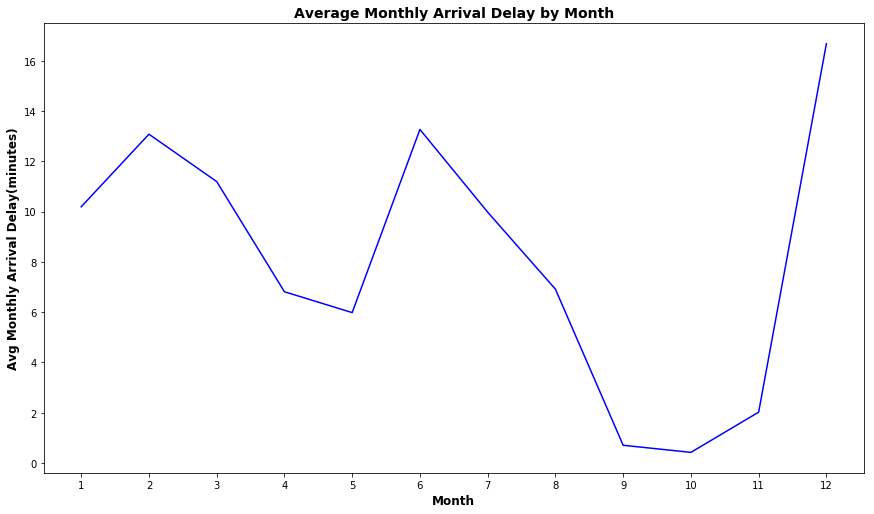

In [83]:
# group months by monthly average arrival delay
ArrDelay_by_mo = df_copy.groupby('Month').mean()['ArrDelay']

# plot the bar chart
plt.figure(figsize = [14.69,8.27])
plt.errorbar(ArrDelay_by_mo.index, ArrDelay_by_mo.values)
ticks  = np.arange(1,13,1)
plt.xticks(ticks, ticks)
plt.title('Average Monthly Arrival Delay by Month', fontsize = 14, weight = 'bold')
plt.xlabel('Month', fontsize = 12, weight = 'semibold')
plt.ylabel('Avg Monthly Arrival Delay(minutes)', fontsize = 12, weight = 'semibold');

As we can see from the line chart, the average monthly delay fluctuates between low to high and seems it repeats itself. However, it will be better if we have data of other years to see if this is a standard pattern and is not specific to this year only. With that being said, we see February and June have about the same average delay around 14 minutes, September , October and  November seems to be the best since the average delay is less than or around two minutes while December is the highest with average delay of around 17 minutes.<br>

In [84]:
# create a new DataFrame for values in CarrierDelay > 0
df_carr_delay = df_copy_v2.query('CarrierDelay > 0')
df_carr_delay.CarrierDelay.describe()

count    670622.000000
mean         35.859571
std          54.180292
min           1.000000
25%           9.000000
50%          19.000000
75%          41.000000
max        2436.000000
Name: CarrierDelay, dtype: float64

### Relationship between Airline Carrier and Carrier Delay

Altough my original plan was to check the relationship between `UniqueCarrier` and `ArrDelay`, I decided to test the relationship between `UniqueCarrier` and `CarrierDelay` instead, since `CarrierDelay` is a direct delay caused by the carrier. Overall, the carrier delay would cause arrival delay. To depict the relationship between the airline carrier and carrier delay, I will create a boxplot.

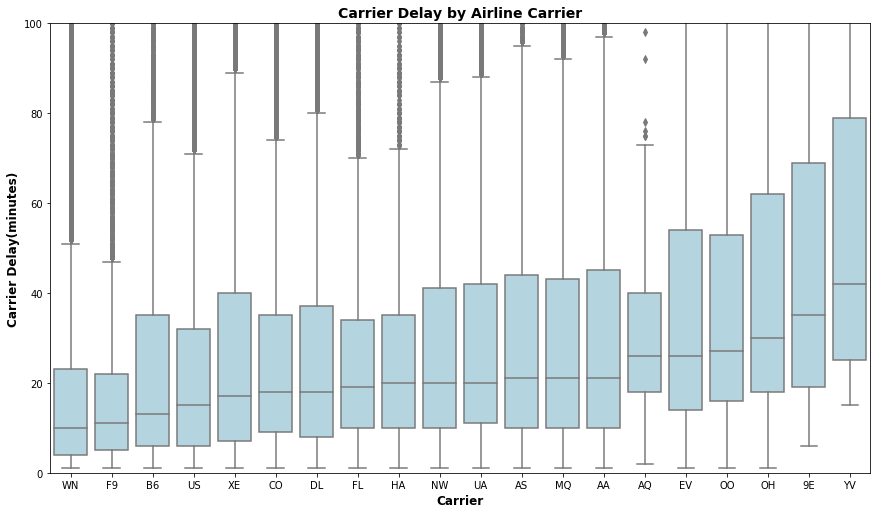

In [85]:
# create an ordered series to sort boxplot by median
order = df_carr_delay.groupby('UniqueCarrier').median()['CarrierDelay'].sort_values()

# create the boxplot
plt.figure(figsize = [14.7,8.27])
sns.boxplot(data = df_carr_delay, x = 'UniqueCarrier', y = 'CarrierDelay', color = 'lightblue', order = order.index)
plt.title('Carrier Delay by Airline Carrier', fontsize = 14, weight = 'bold')
plt.xlabel('Carrier', fontsize =12, weight = 'semibold')
plt.ylabel('Carrier Delay(minutes)', fontsize = 12, weight = 'semibold')
plt.ylim(0,100);

From the boxplot, It seems that **WN** has the lowest median carrier delay, while **YV** has the highest. We can also notice a large amount of variability in the data with extreme outliers in most of the carriers with the lowest in **AQ**.<br>

### Which Airline Carrier Has the Lowest Average Carrier Delay?

To see which airline carrier has the lowest average carrier delay, I am going to create a bar chart and sort it from the lowest to the highest.

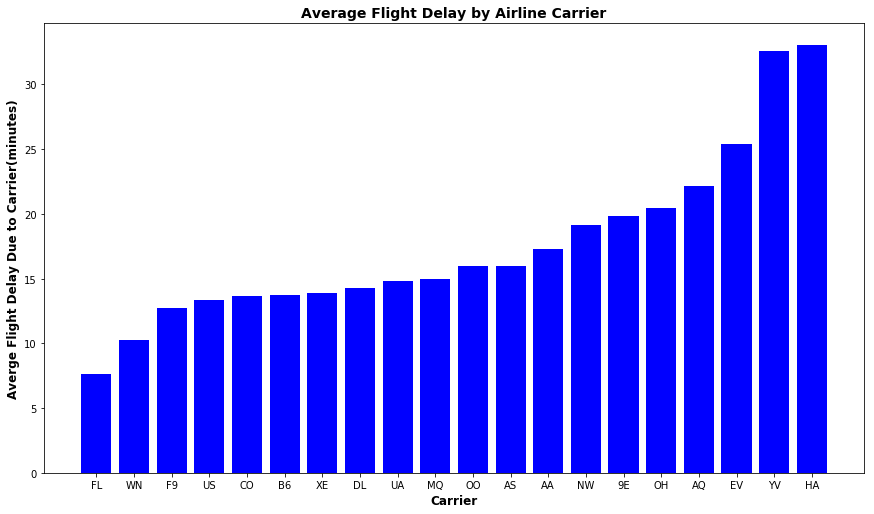

In [86]:
# create sorted pandas Series for average carrier delay by carrier
CarrierDelay_by_carr = df_copy.groupby('UniqueCarrier').mean()['CarrierDelay']
CarrierDelay_by_carr_sorted = CarrierDelay_by_carr.sort_values()

# plot the avarage carrier delay by carrier
plt.figure(figsize = [14.7, 8.27])
plt.bar(CarrierDelay_by_carr_sorted.index, CarrierDelay_by_carr_sorted.values)
plt.title('Average Flight Delay by Airline Carrier', fontsize = 14, weight = 'bold')
plt.xlabel('Carrier', fontsize = 12, weight = 'semibold')
plt.ylabel('Averge Flight Delay Due to Carrier(minutes)', fontsize = 12, weight = 'semibold');

**FL** seems to have the lowest average carrier delay, less than 10 minutes, while **HA** the highest, slightly more than 30 minutes.

In [87]:
def flight_status(x):
    ''' create a function that returns whether a flight is early, on time, or delayed'''
    if x < 0:
        return 'Early'
    elif x ==  0:
        return 'On time'
    else:
        return 'Delayed'
    
# create a new column after applying the function
df_copy['FlightStatus'] = df_copy.ArrDelay.apply(flight_status)
df_copy.head(10)

,Unnamed: 0,Month,UniqueCarrier,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightStatus
0,0,1,WN,116.0,-14.0,8.0,IAD,TPA,810,no,NaN,NaN,NaN,NaN,NaN,Early
1,1,1,WN,113.0,2.0,19.0,IAD,TPA,810,no,NaN,NaN,NaN,NaN,NaN,Delayed
2,2,1,WN,76.0,14.0,8.0,IND,BWI,515,no,NaN,NaN,NaN,NaN,NaN,Delayed
3,3,1,WN,78.0,-6.0,-4.0,IND,BWI,515,no,NaN,NaN,NaN,NaN,NaN,Early
4,4,1,WN,77.0,34.0,34.0,IND,BWI,515,no,2.0,0.0,0.0,0.0,32.0,Delayed
5,5,1,WN,87.0,11.0,25.0,IND,JAX,688,no,NaN,NaN,NaN,NaN,NaN,Delayed
6,6,1,WN,230.0,57.0,67.0,IND,LAS,1591,no,10.0,0.0,0.0,0.0,47.0,Delayed
7,7,1,WN,219.0,-18.0,-1.0,IND,LAS,1591,no,NaN,NaN,NaN,NaN,NaN,Early
8,8,1,WN,70.0,2.0,2.0,IND,MCI,451,no,NaN,NaN,NaN,NaN,NaN,Delayed
9,9,1,WN,70.0,-16.0,0.0,IND,MCI,451,no,NaN,NaN,NaN,NaN,NaN,Early


### Flights Arrival Status

Now, let's find the precentage of flights arrival status, i.e, Early, On Time, and Delayed. To do so, I am going to create a bar plot to compare between the three statuses

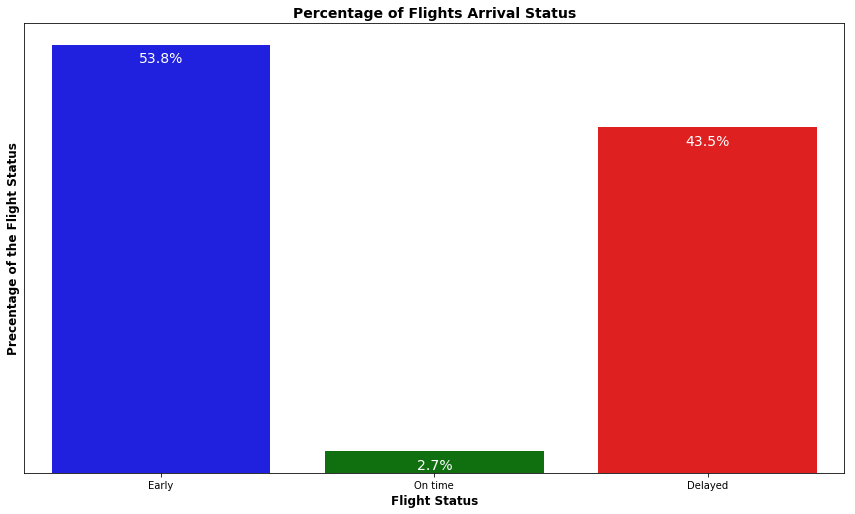

In [88]:
# set bars color
color = ['blue', 'green', 'red']
sns.set_palette(color)

# create customized order
order = ['Early', 'On time', 'Delayed']
cat_order = pd.api.types.CategoricalDtype(categories = order, ordered = True)
df_copy['FlightStatus'] = df_copy['FlightStatus'].astype(cat_order)

# bar chart for flight perecentage by status
plt.figure(figsize = [14.70,8.27])
sns.countplot(data = df_copy, x = 'FlightStatus')

# add annotations
n_points = df_copy.shape[0]
cat_counts = df_copy.FlightStatus.value_counts()
locs, labels = plt.xticks()

# loop through each pair for locations and labels
for loc, label in zip(locs, labels):
    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    plt.text(loc, count-150000, pct_string, ha = 'center', size = 14, color = 'w')
plt.yticks([])   
plt.title('Percentage of Flights Arrival Status', fontsize = 14, weight = 'bold')
plt.ylabel('Precentage of the Flight Status', fontsize = 12, weight = 'semibold')
plt.xlabel('Flight Status', fontsize = 12, weight = 'semibold');

From the bar chart, it seems that the number of **Early** flights is more than the **Delayed**, and **On time** precentage is very small, which might be ok since we defined **On time** to have 0 minutes delay. However, this may not be realistic. We might choose to define **On time** where arrival delay is between 5 minutes early and 5 minutes late, and so on.

## Relationship between Distance and Arrival Delay

I will create a scatter plot to depict the relationship between the distance of the flights and the arrival delay

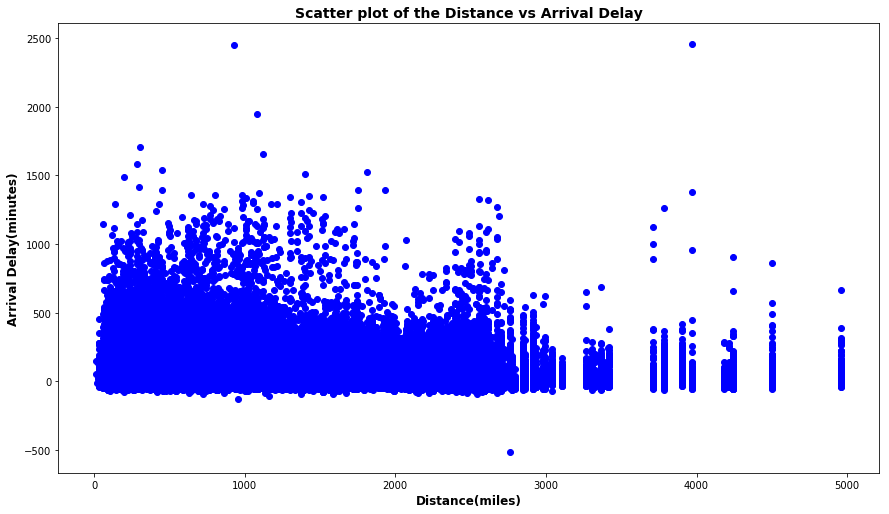

In [89]:
plt.figure(figsize = [14.70, 8.27])
plt.scatter(data = df_copy, x = 'Distance', y = 'ArrDelay')
plt.title('Scatter plot of the Distance vs Arrival Delay', fontsize = 14, weight = 'bold')
plt.xlabel('Distance(miles)', fontsize = 12, weight = 'semibold')
plt.ylabel('Arrival Delay(minutes)', fontsize = 12, weight = 'semibold');

As expected, the distance does not seem to have an effect on the arrival delay.